In [7]:
import os

dataset_path = "/kaggle/input/detect-fire"

if os.path.exists(dataset_path):
    print("Dataset đã tồn tại!")
else:
    print("Dataset không tồn tại!")

Dataset đã tồn tại!


In [ ]:
from ultralytics import YOLO
import torch
import cv2
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Check if GPU is available and set device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

: 

In [3]:
data_yaml = """
train: /kaggle/input/detect-fire/data_img/train
val: /kaggle/input/detect-fire/data_img/test
nc: 2
names: ['smoke', 'fire']
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)

In [4]:
with open('/kaggle/working/data.yaml', 'r') as f:
    print(f.read())


train: /kaggle/input/detect-fire/data_img/train
val: /kaggle/input/detect-fire/data_img/test
nc: 2
names: ['smoke', 'fire']



In [5]:
import os

train_path = '/kaggle/input/detect-fire/data_img/train'

test_path = '/kaggle/input/detect-fire/data_img/test'

In [6]:
import os
import cv2

# Define paths to your train and test directories
train_dir = '/kaggle/input/detect-fire/data_img/train'
test_dir = '/kaggle/input/detect-fire/data_img/test'

# Define output directories for resized images
resized_train_dir = '/kaggle/working/resized_train'
resized_test_dir = '/kaggle/working/resized_test'

# Create the output directories if they don't exist
os.makedirs(resized_train_dir, exist_ok=True)
os.makedirs(resized_test_dir, exist_ok=True)

# Function to resize and save images to a smaller size (e.g., 800x800)
def resize_images(input_dir, output_dir, new_size):  # Modify size as needed
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
            img_path = os.path.join(input_dir, filename)
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image
                resized_img = cv2.resize(img, new_size)

                # Save the resized image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, resized_img)
                print(f"Resized and saved: {output_path}")
            else:
                print(f"Failed to load image: {img_path}")

# Resize images in both train and test directories to 800x800
resize_images(train_dir, resized_train_dir, new_size=(1000, 1000))
resize_images(test_dir, resized_test_dir, new_size=(1000, 1000))


In [7]:
# Đường dẫn tới thư mục chứa file nhãn

label_path = '/kaggle/input/detect-fire/data_img/train/labels'



# Biến để đếm

fire_count = 0

non_fire_count = 0



# Lấy danh sách tất cả các file nhãn

label_files = [f for f in os.listdir(label_path) if f.endswith('.txt')]



class_list = []

# Duyệt qua tất cả các file nhãn

for label_file in label_files:

    with open(os.path.join(label_path, label_file), 'r') as f:

        lines = f.readlines()

        # if len(lines) > 0:

        #     fire_count += 1

        # else:

        #     non_fire_count += 1

        for line in lines:

            class_id = int(line.split()[0])  # Lấy class_id từ file nhãn

            class_list.append(class_id)

            if class_id == 1:

                fire_count += 1  # Nếu class_id là 1 (cháy), tăng số lượng cháy

            elif class_id == 0:

                non_fire_count += 1  # Nếu class_id là 0 (không cháy), tăng số lượng không cháy

# In kết quả

print(f"Số lượng ảnh cháy: {fire_count}")

print(f"Số lượng ảnh không cháy: {non_fire_count}")

print(fire_count + non_fire_count)

Số lượng ảnh cháy: 11814
Số lượng ảnh không cháy: 9550
21364


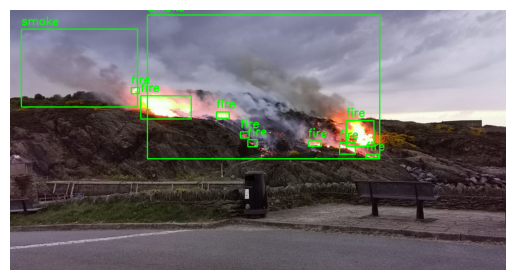

In [8]:
import cv2

import os

import matplotlib.pyplot as plt



# Đọc thông tin từ file label và vẽ bounding box lên ảnh

def draw_bounding_boxes(image_path, label_path, class_names):

    # Đọc ảnh

    image = cv2.imread(image_path)

    img_height, img_width, _ = image.shape

    

    # Đọc file nhãn

    with open(label_path, 'r') as f:

        labels = f.readlines()

    

    for label in labels:

        # Tách các giá trị từ file nhãn

        class_id, x_center, y_center, width, height = map(float, label.split())

        

        # Chuyển đổi tọa độ từ tỷ lệ (YOLO format) sang tọa độ pixel

        x_center = int(x_center * img_width)

        y_center = int(y_center * img_height)

        box_width = int(width * img_width)

        box_height = int(height * img_height)

        

        # Tính toán tọa độ góc trên trái và dưới phải của bounding box

        x1 = int(x_center - box_width / 2)

        y1 = int(y_center - box_height / 2)

        x2 = int(x_center + box_width / 2)

        y2 = int(y_center + box_height / 2)

        

        # Vẽ bounding box (màu xanh lá cây) và tên lớp đối tượng

        color = (0, 255, 0)

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        label = class_names[int(class_id)]

        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    

    # Chuyển đổi từ BGR sang RGB để hiển thị trong matplotlib

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    

    # Hiển thị ảnh bằng matplotlib

    plt.imshow(image_rgb)

    plt.axis('off')  # Tắt hiển thị các trục

    plt.show()



# Ví dụ sử dụng

image_path = '/kaggle/input/detect-fire/data_img/train/images/WEB04478.jpg'

label_path = '/kaggle/input/detect-fire/data_img/train/labels/WEB04478.txt'

class_names = ['smoke', 'fire']  # Thay thế bằng tên các lớp của bạn



draw_bounding_boxes(image_path, label_path, class_names)


In [9]:
# Load YOLOv8 model (YOLOv8n is a smaller, faster version)
model = YOLO('yolov8n.pt')  # Use yolov8n (nano) as an example

# Move model to GPU
model.to(device)

# Train the model
data_yaml_path = '/kaggle/working/data.yaml'  # Ensure the correct path to the dataset YAML

100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


In [10]:
os.environ['WANDB_MODE'] = 'disabled'

In [11]:
# import shutil
# import os

# # Path to the working directory
# working_dir = '/kaggle/working'

# # Loop through all items in the directory and delete them
# for filename in os.listdir(working_dir):
#     file_path = os.path.join(working_dir, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)  # Remove the file
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # Remove the directory and its contents
#     except Exception as e:
#         print(f'Failed to delete {file_path}. Reason: {e}')


In [12]:
model.train(
    data=data_yaml_path, 
    epochs=100, 
    imgsz=800, 
    batch=16, 
    save_period=1,  # Save after every epoch
    project='yolo_project',  # Valid project name without special characters
    name='yolo_train',  # Subfolder name
    # resume=True,  # This tells YOLO to resume training from the last checkpoint
    # weights='/kaggle/working/yolo_project/yolo_train/weights/last.pt'  # Path to the last checkpoint
)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=1, cache=False, device=cuda:0, workers=8, project=yolo_project, name=yolo_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fa

100%|██████████| 755k/755k [00:00<00:00, 38.7MB/s]
2024-10-26 13:13:13,354	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-26 13:13:13,872	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 174MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/detect-fire/data_img/train/labels... 17221 images, 7833 backgrounds, 0 corrupt: 100%|██████████| 17221/17221 [00:37<00:00, 464.83it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/detect-fire/data_img/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/detect-fire/data_img/test/labels... 4306 images, 2005 backgrounds, 8 corrupt: 100%|██████████| 4306/4306 [00:10<00:00, 394.01it/s]

val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB10769.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0297]
val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB10770.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0078]
val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB10775.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0156]
val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB10821.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0094]
val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB11090.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0028]
val: WARNING ⚠️ /kaggle/input/detect-fire/data_img/test/images/WEB11598.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0359]
val: WARNI

val: WARNING ⚠️ Cache directory /kaggle/input/detect-fire/data_img/test is not writeable, cache not saved.
Plotting labels to yolo_project/yolo_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to yolo_project/yolo_train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.31G      1.629      3.146      1.602         12        800: 100%|██████████| 1077/1077 [04:50<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:30<00:00,  4.41it/s]


                   all       4298       5176      0.501      0.434      0.401      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.33G      1.641       2.13      1.574         11        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.31it/s]


                   all       4298       5176      0.428      0.331      0.316      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.29G      1.735      2.011      1.661         27        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.31it/s]


                   all       4298       5176      0.421      0.335      0.317       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.3G      1.766      1.996        1.7         17        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]


                   all       4298       5176      0.436      0.387      0.365      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.29G      1.711      1.859       1.65          7        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.36it/s]


                   all       4298       5176      0.563      0.463      0.488      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.27G      1.677      1.774      1.628         14        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.39it/s]


                   all       4298       5176      0.586      0.512      0.545      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.29G      1.637      1.693      1.593          8        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.42it/s]


                   all       4298       5176       0.58      0.531      0.548      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.3G       1.61       1.65      1.574          8        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.38it/s]


                   all       4298       5176      0.602       0.55      0.582      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.33G      1.591      1.593      1.556         10        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]


                   all       4298       5176      0.601      0.547      0.585      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.29G      1.568      1.553      1.548         16        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.42it/s]


                   all       4298       5176      0.623      0.574      0.612      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.3G      1.563      1.537      1.544          5        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.39it/s]


                   all       4298       5176      0.642      0.564      0.619      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.29G      1.549      1.509      1.532         13        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.39it/s]


                   all       4298       5176      0.648      0.588      0.641      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.28G      1.526      1.476      1.511         13        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.42it/s]


                   all       4298       5176      0.646      0.596      0.648      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.26G      1.525      1.462      1.509          6        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.36it/s]


                   all       4298       5176      0.677      0.602      0.661      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.29G      1.513      1.435      1.501         11        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.49it/s]


                   all       4298       5176      0.666      0.621      0.674      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.26G      1.507      1.424      1.496          8        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.41it/s]


                   all       4298       5176      0.676      0.632       0.68      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.29G      1.497      1.402      1.487          9        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.40it/s]


                   all       4298       5176      0.685      0.617      0.685      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.26G      1.484      1.376      1.476          3        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.46it/s]


                   all       4298       5176      0.696       0.63      0.691      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.28G      1.476      1.374      1.469         19        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.45it/s]


                   all       4298       5176      0.708      0.637      0.705      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.26G      1.478      1.361      1.468         19        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.41it/s]


                   all       4298       5176      0.692      0.644      0.698      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.28G      1.469      1.352      1.468         12        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]


                   all       4298       5176       0.69      0.658      0.708      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.26G      1.461      1.332      1.458         18        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.55it/s]


                   all       4298       5176      0.696      0.642       0.71      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.29G      1.451       1.31      1.452         20        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.49it/s]

                   all       4298       5176      0.705      0.654      0.718      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.26G      1.442      1.301      1.443         10        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.43it/s]

                   all       4298       5176      0.718      0.666      0.728      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.25G       1.44      1.298       1.44         18        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.46it/s]


                   all       4298       5176      0.712      0.667      0.731       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.26G       1.43      1.285       1.43         15        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.46it/s]


                   all       4298       5176      0.729      0.661      0.734      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.28G      1.438      1.279      1.437          4        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.49it/s]


                   all       4298       5176      0.726      0.678      0.738      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.29G      1.426      1.264      1.433         11        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.725      0.676      0.739      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.27G      1.423      1.259       1.43         14        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.52it/s]

                   all       4298       5176      0.722      0.681      0.746       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.26G      1.421      1.245      1.425         12        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]

                   all       4298       5176      0.734      0.676      0.745      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.33G       1.41      1.234      1.421         16        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.55it/s]

                   all       4298       5176       0.74      0.672      0.747      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.26G      1.402      1.228      1.414         13        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.53it/s]


                   all       4298       5176      0.732      0.675      0.749      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.28G      1.402      1.209      1.406         14        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.58it/s]

                   all       4298       5176      0.728      0.692      0.753       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.3G      1.394      1.208      1.406         18        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.61it/s]

                   all       4298       5176      0.737      0.682      0.752      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.29G       1.39      1.206        1.4          8        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]


                   all       4298       5176      0.732      0.694      0.757      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.28G      1.387      1.199      1.401         18        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]

                   all       4298       5176      0.737      0.694      0.759      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.27G      1.384      1.182        1.4         12        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]


                   all       4298       5176      0.748      0.694      0.761      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.3G      1.384      1.188      1.392          8        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.45it/s]


                   all       4298       5176       0.74      0.697      0.762      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.25G      1.377      1.169      1.395         20        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.747        0.7      0.765      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.28G       1.37      1.169      1.389         11        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]

                   all       4298       5176       0.75      0.704      0.767      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.24G      1.374      1.166      1.389         16        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]


                   all       4298       5176      0.748      0.703      0.768      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.29G      1.369      1.152      1.392         15        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]

                   all       4298       5176      0.748      0.702      0.766      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.29G       1.36       1.14      1.376          9        800: 100%|██████████| 1077/1077 [04:40<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.44it/s]

                   all       4298       5176      0.744      0.702      0.765      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.25G      1.355      1.136      1.374          7        800: 100%|██████████| 1077/1077 [04:40<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.52it/s]

                   all       4298       5176      0.747      0.704      0.769      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.28G       1.35      1.123      1.369          6        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.44it/s]

                   all       4298       5176      0.753      0.703       0.77      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.33G      1.351      1.118      1.367          5        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.45it/s]

                   all       4298       5176      0.753      0.704      0.772      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.28G      1.345       1.12      1.368         14        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.56it/s]


                   all       4298       5176      0.757      0.703      0.773      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.29G      1.343      1.113      1.366         25        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]

                   all       4298       5176      0.759        0.7      0.774      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.28G      1.334        1.1      1.362          3        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]

                   all       4298       5176      0.755      0.704      0.774      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.26G      1.334      1.098      1.359          9        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.751      0.712      0.775      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.29G      1.327      1.084      1.357          5        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]


                   all       4298       5176      0.752      0.711      0.774       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.29G      1.328      1.087      1.356         17        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]

                   all       4298       5176      0.761      0.707      0.775       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.27G      1.321      1.071      1.343         15        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.54it/s]

                   all       4298       5176      0.756      0.714      0.777       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       3.3G      1.319      1.067      1.343         16        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.53it/s]

                   all       4298       5176      0.762      0.714      0.779      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.25G      1.316      1.068      1.345         14        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.54it/s]

                   all       4298       5176       0.76      0.715      0.778      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.25G      1.303      1.053      1.337         16        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.52it/s]

                   all       4298       5176      0.758      0.714      0.779      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.31G       1.31      1.056      1.339         10        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.55it/s]


                   all       4298       5176      0.766      0.712      0.781      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.26G      1.295      1.034      1.329         22        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.53it/s]

                   all       4298       5176      0.766       0.71       0.78      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.3G      1.303      1.047      1.336          8        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.49it/s]

                   all       4298       5176      0.766      0.711       0.78      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.25G      1.296      1.043      1.332          7        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.58it/s]

                   all       4298       5176       0.77      0.708       0.78      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.24G      1.289      1.021      1.326         13        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.60it/s]

                   all       4298       5176      0.769      0.713      0.781      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.26G       1.29      1.023      1.322         10        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.57it/s]

                   all       4298       5176      0.771      0.711      0.782      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.29G      1.283      1.017       1.32          9        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.53it/s]

                   all       4298       5176      0.769      0.713      0.782      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.33G      1.284      1.007      1.314         13        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:23<00:00,  5.63it/s]

                   all       4298       5176       0.77      0.713      0.783      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.24G      1.281      1.007      1.316         13        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.57it/s]

                   all       4298       5176      0.772      0.712      0.783      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.26G      1.265     0.9923      1.306         15        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.49it/s]

                   all       4298       5176      0.775       0.71      0.784      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.29G      1.263     0.9918      1.305          5        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.60it/s]

                   all       4298       5176      0.775      0.711      0.783      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.29G      1.268     0.9878      1.308         25        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.47it/s]

                   all       4298       5176      0.773      0.712      0.783      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.32G      1.258     0.9746        1.3         15        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.46it/s]

                   all       4298       5176      0.774      0.712      0.784      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.28G       1.26     0.9663      1.302          6        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.43it/s]

                   all       4298       5176      0.774      0.714      0.784      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.28G      1.251     0.9607      1.291         16        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.41it/s]

                   all       4298       5176      0.775      0.714      0.784      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.25G      1.249     0.9543      1.291         17        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.62it/s]

                   all       4298       5176      0.773      0.714      0.784      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.28G      1.238     0.9496       1.29          5        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.52it/s]

                   all       4298       5176      0.773      0.713      0.784      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.29G      1.232     0.9388      1.281          2        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.53it/s]

                   all       4298       5176      0.769      0.715      0.784      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.28G      1.237      0.939      1.282         12        800: 100%|██████████| 1077/1077 [04:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.57it/s]

                   all       4298       5176      0.772      0.715      0.785       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.25G      1.238     0.9402      1.284         12        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.61it/s]

                   all       4298       5176      0.771      0.718      0.785       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.27G      1.224     0.9313      1.279         10        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.57it/s]

                   all       4298       5176      0.773      0.717      0.785       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.26G       1.22      0.915      1.275         26        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.55it/s]

                   all       4298       5176      0.775      0.716      0.785      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.25G       1.22     0.9174      1.277          8        800: 100%|██████████| 1077/1077 [04:36<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.52it/s]

                   all       4298       5176      0.773      0.717      0.786      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.25G      1.216     0.9075      1.274         17        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.47it/s]

                   all       4298       5176       0.77       0.72      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.28G      1.206     0.8961      1.265         13        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:23<00:00,  5.65it/s]

                   all       4298       5176       0.77      0.721      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.29G      1.205     0.8918      1.261         24        800: 100%|██████████| 1077/1077 [04:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.57it/s]

                   all       4298       5176      0.766      0.723      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.28G        1.2      0.891      1.261         19        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.41it/s]

                   all       4298       5176      0.767      0.723      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.29G      1.194     0.8758      1.256         14        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.60it/s]

                   all       4298       5176      0.767      0.721      0.787      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.25G      1.194     0.8753      1.249          7        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.44it/s]

                   all       4298       5176      0.768      0.721      0.787      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.28G      1.184     0.8635      1.248         16        800: 100%|██████████| 1077/1077 [04:37<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.51it/s]

                   all       4298       5176       0.77      0.721      0.787      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.29G      1.179     0.8587      1.245          8        800: 100%|██████████| 1077/1077 [04:39<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.38it/s]

                   all       4298       5176       0.77       0.72      0.787      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.28G       1.18     0.8525      1.245          8        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.45it/s]

                   all       4298       5176      0.769      0.721      0.787      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.24G      1.174      0.852       1.24         13        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]

                   all       4298       5176       0.77      0.721      0.787      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.26G      1.172     0.8425      1.241          5        800: 100%|██████████| 1077/1077 [04:38<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.769      0.722      0.787      0.464


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.25G      1.203     0.8047      1.269          4        800: 100%|██████████| 1077/1077 [04:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.50it/s]

                   all       4298       5176      0.771      0.721      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.28G      1.181      0.778      1.248          7        800: 100%|██████████| 1077/1077 [04:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.59it/s]

                   all       4298       5176       0.77      0.722      0.787      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.24G      1.176     0.7588      1.248          3        800: 100%|██████████| 1077/1077 [04:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.54it/s]

                   all       4298       5176      0.768      0.722      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.26G      1.163     0.7593      1.239          3        800: 100%|██████████| 1077/1077 [04:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.771      0.722      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.26G      1.157     0.7501      1.235          6        800: 100%|██████████| 1077/1077 [04:23<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.48it/s]

                   all       4298       5176      0.769      0.722      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.25G      1.145     0.7364      1.226          7        800: 100%|██████████| 1077/1077 [04:32<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.33it/s]

                   all       4298       5176       0.77      0.721      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.24G      1.147     0.7352      1.227          2        800: 100%|██████████| 1077/1077 [04:24<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.31it/s]

                   all       4298       5176      0.766      0.723      0.788      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.28G      1.137     0.7286      1.227          3        800: 100%|██████████| 1077/1077 [04:32<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.45it/s]

                   all       4298       5176      0.768      0.722      0.788      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.26G      1.135     0.7159      1.221          7        800: 100%|██████████| 1077/1077 [04:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:24<00:00,  5.47it/s]

                   all       4298       5176       0.77      0.722      0.788      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.25G       1.13     0.7152      1.218          5        800: 100%|██████████| 1077/1077 [04:31<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.32it/s]

                   all       4298       5176       0.77      0.723      0.788      0.465



100 epochs completed in 8.367 hours.
Optimizer stripped from yolo_project/yolo_train/weights/last.pt, 6.3MB
Optimizer stripped from yolo_project/yolo_train/weights/best.pt, 6.3MB

Validating yolo_project/yolo_train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 135/135 [00:25<00:00,  5.20it/s]


                   all       4298       5176       0.77      0.723      0.788      0.465
                 smoke       2073       2307      0.814      0.793      0.846      0.533
                  fire       1110       2869      0.727      0.654      0.731      0.396
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to yolo_project/yolo_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecf13dd30a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804